# Первичный осмотр данных.

In [1]:
import pandas as pd

In [2]:
tab = pd.read_csv('part_10.csv')

In [3]:
tab.head()

,CLIENT_IP,CLIENT_USERAGENT,REQUEST_SIZE,RESPONSE_CODE,MATCHED_VARIABLE_SRC,MATCHED_VARIABLE_NAME,MATCHED_VARIABLE_VALUE,EVENT_ID
0,188.138.92.55,NaN,166,404,REQUEST_URI,NaN,//tmp/20160925122692indo.php.vob,AVdhXFgVq1Ppo9zF5Fxu
1,93.158.215.131,Mozilla/5.0 (Windows NT 6.3; WOW64; rv:45.0) G...,431,302,REQUEST_GET_ARGS,url,http://www.galitsios.gr/?option=com_k2,AVdcJmIIq1Ppo9zF2YIp
2,176.123.240.64,Mozilla/5.0 (Windows NT 6.0; rv:34.0) Gecko/20...,395,403,REQUEST_PATH,NaN,"/opinion/page1_3.php\"" and \""\""x\""\""=\""\""x\""",iz7SN2YBrgKk_RFNZW_U
3,73.78.81.63,Mozilla/5.0 (Windows NT 6.3; WOW64; rv:45.0) G...,387,302,REQUEST_GET_ARGS,url,http://thereviewgroup.org/boss-capital/,AVdjekw4q1Ppo9zF6QT2
4,66.102.9.44,Mozilla/5.0 (Linux; Android 4.4.2; GT-N7100 Bu...,1733,404,REQUEST_GET_ARGS,REQUEST_GET_ARGS._,1516288084140,SqQGI2QB5cBXmMW1CDbp


In [4]:
tab['CLIENT_IP'].value_counts()

217.175.140.69     11286
37.46.129.136        771
188.43.52.163        767
5.143.231.38         757
192.168.100.63       748
                   ...  
85.26.232.159          1
188.162.192.161        1
178.70.94.21           1
168.235.196.230        1
89.23.32.19            1
Name: CLIENT_IP, Length: 24940, dtype: int64

In [5]:
from processing import detection_of_nan_in_strings

In [6]:
tab = detection_of_nan_in_strings(tab, 'CLIENT_IP')

In [7]:
tab['anomaly_CLIENT_IP'].value_counts()

0    57838
1        7
Name: anomaly_CLIENT_IP, dtype: int64

In [8]:
tab['CLIENT_USERAGENT'].value_counts()

Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7.0; rv:11.0) like Gecko                                                                                                                             2117
Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.132 Safari/537.36                                                                               1806
Mozilla/5.0 (compatible; AhrefsBot/5.2; +http://ahrefs.com/robot/)                                                                                                                               1805
Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.132 Safari/537.36                                                                              1677
Google Update/1.3.33.7;winhttp;cup-ecdsa                                                                                                                                                         1537
          

In [9]:
tab = detection_of_nan_in_strings(tab, 'CLIENT_USERAGENT')

In [10]:
tab['anomaly_CLIENT_USERAGENT'].value_counts()

0    57517
1      328
Name: anomaly_CLIENT_USERAGENT, dtype: int64

In [11]:
from processing import convertation_to_int

Мы вводим anomaly_request_size, так как если размер реквеста не числовой, то это явная аномалия.

In [12]:
tab = convertation_to_int(tab, 'REQUEST_SIZE', 'anomaly_request_size')

In [13]:
tab['anomaly_request_size'].value_counts()

0    57730
1      115
Name: anomaly_request_size, dtype: int64

In [14]:
tab['REQUEST_SIZE_INT'].describe()

count    5.773000e+04
mean     5.802108e+03
std      1.124405e+05
min      1.500000e+01
25%      5.710000e+02
50%      9.720000e+02
75%      1.621000e+03
max      1.052965e+07
Name: REQUEST_SIZE_INT, dtype: float64

<AxesSubplot:>

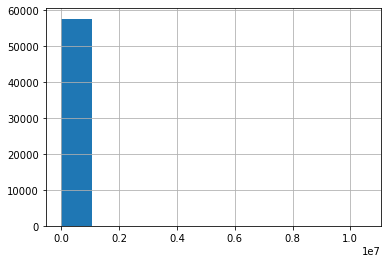

In [15]:
tab['REQUEST_SIZE_INT'].hist()

<AxesSubplot:>

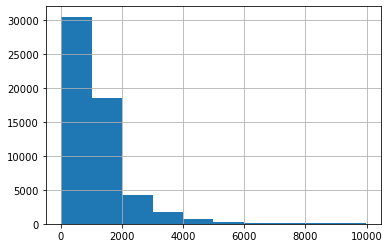

In [16]:
tab.loc[tab['REQUEST_SIZE_INT'] < 10000, 'REQUEST_SIZE_INT'].hist()

<AxesSubplot:>

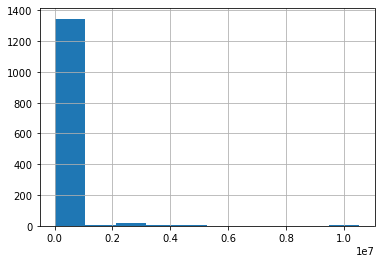

In [17]:
tab.loc[tab['REQUEST_SIZE_INT'] >= 10000, 'REQUEST_SIZE_INT'].hist()

In [18]:
len(tab.loc[tab['REQUEST_SIZE_INT'] >= 10000, 'REQUEST_SIZE_INT'])/len(tab)

0.023891434004667648

Да, мы видим определённую долю достаточно больших реквестов. Вручную фильтровать не нужно, должен справиться сам HDBSCAN.

Мы вводим anomaly_response_code, так как если он не конверитися в число, то это явная аномалия.

In [19]:
tab = convertation_to_int(tab, 'RESPONSE_CODE', 'anomaly_response_code')

In [20]:
tab['RESPONSE_CODE_INT'].describe()

count    57730.000000
mean       300.387892
std         98.733956
min          0.000000
25%        200.000000
50%        302.000000
75%        404.000000
max        504.000000
Name: RESPONSE_CODE_INT, dtype: float64

<AxesSubplot:>

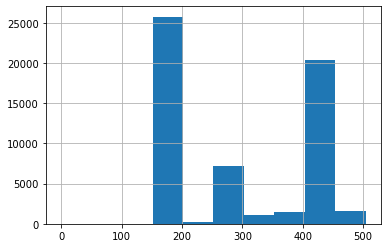

In [21]:
tab['RESPONSE_CODE_INT'].hist()

In [22]:
tab['anomaly_request_size'].value_counts()

0    57730
1      115
Name: anomaly_request_size, dtype: int64

In [23]:
tab['anomaly_response_code'].value_counts()

0    57730
1      115
Name: anomaly_response_code, dtype: int64

In [24]:
(tab['anomaly_request_size'] == tab['anomaly_response_code']).describe()

count     57845
unique        1
top        True
freq      57845
dtype: object

Две переменные почти точно совпадают, поэтому достаточно оставить только одну.

In [25]:
del tab['anomaly_response_code']

In [26]:
tab['MATCHED_VARIABLE_VALUE'].value_counts()

{\"tags\":[{\"sizes\":[{\"width\":728,\"height\":90},{\"width\":620,\"height\":400},{\"width\":650,\"height\":170},{\"width\":750,\"height\":200},{\"width\":750,\"height\":300},{\"width\":760,\"height\":100},{\"width\":768,\"height\":150},{\"width\":800,\"height\":250},{\"width\":930,\"height\":80},{\"width\":930,\"height\":100},{\"width\":930,\"height\":180},{\"width\":940,\"height\":180},{\"width\":940,\"height\":300},{\"width\":960,\"height\":180},{\"width\":970,\"height\":40},{\"width\":970,\"height\":90},{\"width\":970,\"height\":250},{\"width\":980,\"height\":120},{\"width\":980,\"height\":150},{\"width\":980,\"height\":240},{\"width\":980,\"height\":250},{\"width\":980,\"height\":300},{\"width\":980,\"height\":400},{\"width\":994,\"height\":118},{\"width\":994,\"height\":250},{\"width\":1000,\"height\":90},{\"width\":1000,\"height\":300},{\"width\":1010,\"height\":150},{\"width\":1010,\"height\":300},{\"width\":1192,\"height\":300},{\"width\":1250,\"height\":240},{\"width\":1250

In [27]:
tab = detection_of_nan_in_strings(tab, 'MATCHED_VARIABLE_VALUE')

In [28]:
tab['anomaly_MATCHED_VARIABLE_VALUE'].value_counts()

0    57683
1      162
Name: anomaly_MATCHED_VARIABLE_VALUE, dtype: int64

In [29]:
tab['EVENT_ID'].value_counts()

cr1nJWQB5cBXmMW1hh_4    7
m1K7G2QB5cBXmMW1pcnY    6
XZ-bImQB5cBXmMW11ksX    6
l1mUHGQB5cBXmMW1mdYm    6
dqqPI2QB5cBXmMW1L9-m    5
                       ..
tskW_2MBjksgoq1eYPMT    1
4FdJHGQB5cBXmMW1pWia    1
nr1TE2QBoRd31uenZLDh    1
U5SuIWQB5cBXmMW1q6G5    1
AVdrtwAxq1Ppo9zF-v1_    1
Name: EVENT_ID, Length: 54410, dtype: int64

In [30]:
tab = detection_of_nan_in_strings(tab, 'EVENT_ID')

In [31]:
tab['anomaly_EVENT_ID'].value_counts()

0    57666
1      179
Name: anomaly_EVENT_ID, dtype: int64

In [32]:
tab['RESPONSE_CODE_INT'].value_counts()

200.0    25771
404.0    20367
302.0     6630
403.0     1156
304.0      940
504.0      700
301.0      584
502.0      558
500.0      318
400.0      212
204.0      116
206.0       90
307.0       74
405.0       63
503.0       62
401.0       46
303.0       37
207.0        4
429.0        1
0.0          1
Name: RESPONSE_CODE_INT, dtype: int64

In [33]:
tab['MATCHED_VARIABLE_SRC'].value_counts()

REQUEST_GET_ARGS                    20812
REQUEST_COOKIES                      9303
REQUEST_HEADERS                      4930
REQUEST_PATH                         4011
REQUEST_ARGS                         3729
RESPONSE_HEADERS                     3364
REQUEST_POST_ARGS                    3304
REQUEST_URI                          3143
REQUEST_XML                          1959
REQUEST_METHOD\';\'REQUEST_CONTE      812
REQUEST_URI\';\'REQUEST_ARGS          666
REQUEST_ARGS_KEYS                     639
REQUEST_JSON                          587
REQUEST_METHOD\';\'REQUEST_HEADE      227
CLIENT_USERAGENT                      133
CLIENT_SESSION_ID                      42
REQUEST_QUERY                          35
RESPONSE_BODY                          22
REQUEST_CONTENT_TYPE                    6
REQUEST_FILES                           5
CLIENT_IP                               1
Name: MATCHED_VARIABLE_SRC, dtype: int64

In [34]:
tab = detection_of_nan_in_strings(tab, 'MATCHED_VARIABLE_SRC')

In [35]:
tab['anomaly_MATCHED_VARIABLE_SRC'].value_counts()

0    57730
1      115
Name: anomaly_MATCHED_VARIABLE_SRC, dtype: int64

In [36]:
tab['MATCHED_VARIABLE_NAME'].value_counts()

REQUEST_GET_ARGS._                                                 11165
REQUEST_COOKIES.LtpaToken2                                          3945
REQUEST_PATH                                                        3821
REQUEST_COOKIES.User-cn                                             2444
action                                                              2378
                                                                   ...  
DETAIL_TEXT                                                            1
XâO½#*«
WÒ:©¹µMÖ\täÛk17qòmʂ3³vޡ¥%f®»                           1
srchPat%255B4%255D                                                     1
/content/goods/item[25]:Comment                                        1
XâO½#*«
WÒ:©¹µMÖ\täÛk17qòmʂ3³vާÏ?æÞÅË
Ëî<èMkq,,ÜÆì½8        1
Name: MATCHED_VARIABLE_NAME, Length: 3209, dtype: int64

In [37]:
tab = detection_of_nan_in_strings(tab, 'MATCHED_VARIABLE_NAME')

In [38]:
tab['anomaly_MATCHED_VARIABLE_NAME'].value_counts()

0    53167
1     4678
Name: anomaly_MATCHED_VARIABLE_NAME, dtype: int64

In [39]:
tab['MATCHED_VARIABLE_VALUE'].value_counts()

{\"tags\":[{\"sizes\":[{\"width\":728,\"height\":90},{\"width\":620,\"height\":400},{\"width\":650,\"height\":170},{\"width\":750,\"height\":200},{\"width\":750,\"height\":300},{\"width\":760,\"height\":100},{\"width\":768,\"height\":150},{\"width\":800,\"height\":250},{\"width\":930,\"height\":80},{\"width\":930,\"height\":100},{\"width\":930,\"height\":180},{\"width\":940,\"height\":180},{\"width\":940,\"height\":300},{\"width\":960,\"height\":180},{\"width\":970,\"height\":40},{\"width\":970,\"height\":90},{\"width\":970,\"height\":250},{\"width\":980,\"height\":120},{\"width\":980,\"height\":150},{\"width\":980,\"height\":240},{\"width\":980,\"height\":250},{\"width\":980,\"height\":300},{\"width\":980,\"height\":400},{\"width\":994,\"height\":118},{\"width\":994,\"height\":250},{\"width\":1000,\"height\":90},{\"width\":1000,\"height\":300},{\"width\":1010,\"height\":150},{\"width\":1010,\"height\":300},{\"width\":1192,\"height\":300},{\"width\":1250,\"height\":240},{\"width\":1250

In [40]:
tab.columns

Index(['CLIENT_IP', 'CLIENT_USERAGENT', 'REQUEST_SIZE', 'RESPONSE_CODE',
       'MATCHED_VARIABLE_SRC', 'MATCHED_VARIABLE_NAME',
       'MATCHED_VARIABLE_VALUE', 'EVENT_ID', 'anomaly_CLIENT_IP',
       'anomaly_CLIENT_USERAGENT', 'anomaly_request_size', 'REQUEST_SIZE_INT',
       'RESPONSE_CODE_INT', 'anomaly_MATCHED_VARIABLE_VALUE',
       'anomaly_EVENT_ID', 'anomaly_MATCHED_VARIABLE_SRC',
       'anomaly_MATCHED_VARIABLE_NAME'],
      dtype='object')

In [41]:
len(tab[(tab['anomaly_MATCHED_VARIABLE_NAME'] == 1) & (tab['anomaly_MATCHED_VARIABLE_VALUE'] == 0)])

4562

In [42]:
len(tab[tab['anomaly_CLIENT_IP'] + tab['anomaly_CLIENT_USERAGENT'] + tab['anomaly_EVENT_ID'] + tab['anomaly_MATCHED_VARIABLE_SRC'] + tab['anomaly_MATCHED_VARIABLE_NAME'] + tab['anomaly_MATCHED_VARIABLE_VALUE'] > 0])/len(tab)

0.08323969228109604

# Обработка данных.

Мы начнем с того, что составим из Client_IP 4 числовых колонки, а то, что не удалось включить в колонки посчитаем аномалией.

In [43]:
from processing import process_client_ip

In [44]:
tab = process_client_ip(tab)

In [45]:
tab['anomaly_client_ip'].value_counts()

0    57436
1      409
Name: anomaly_client_ip, dtype: int64

In [46]:
tab['anomaly_CLIENT_IP'].value_counts()

0    57838
1        7
Name: anomaly_CLIENT_IP, dtype: int64

(count    57845.000000
 mean       136.685988
 std         70.514846
 min          0.000000
 25%         83.000000
 50%        153.000000
 75%        213.000000
 max        223.000000
 Name: CLIENT_IP_1, dtype: float64,
 <AxesSubplot:>)

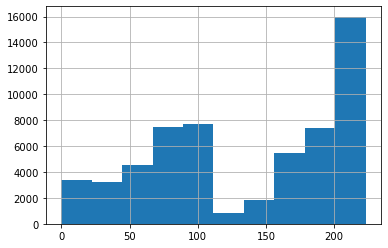

In [47]:
tab['CLIENT_IP_1'].describe(), tab['CLIENT_IP_1'].hist()

(count    57845.000000
 mean       135.081321
 std         68.598368
 min          0.000000
 25%         72.000000
 50%        159.000000
 75%        175.000000
 max        255.000000
 Name: CLIENT_IP_2, dtype: float64,
 <AxesSubplot:>)

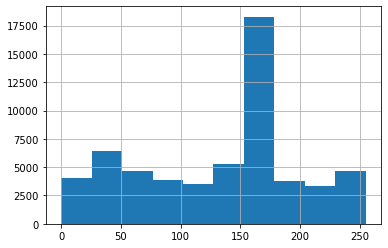

In [48]:
tab['CLIENT_IP_2'].describe(), tab['CLIENT_IP_2'].hist()

(count    57845.000000
 mean       128.564474
 std         65.652327
 min          0.000000
 25%         81.000000
 50%        140.000000
 75%        166.000000
 max        255.000000
 Name: CLIENT_IP_3, dtype: float64,
 <AxesSubplot:>)

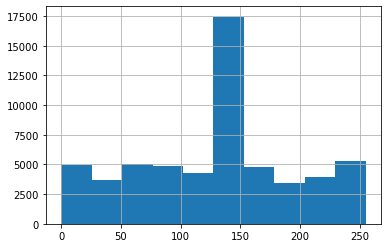

In [49]:
tab['CLIENT_IP_3'].describe(), tab['CLIENT_IP_3'].hist()

(count    57845.000000
 mean       103.172841
 std         68.936018
 min          0.000000
 25%         57.000000
 50%         70.000000
 75%        155.000000
 max        255.000000
 Name: CLIENT_IP_4, dtype: float64,
 <AxesSubplot:>)

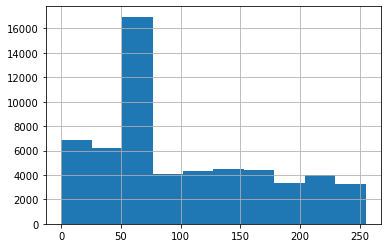

In [50]:
tab['CLIENT_IP_4'].describe(), tab['CLIENT_IP_4'].hist()

In [51]:
tab.loc[239, 'CLIENT_USERAGENT']

'Mozilla/5.0 (Linux; U; Android 6.0.1; en-US; SM-A500F Build/MMB29M) AppleWebKit/534.30 (KHTML, like Gecko) Version/4.0 UCBrowser/11.4.5.1005 U3/0.8.0 Mobile Safari/534.30'

Теперь мы займёмся CLIENT_USERAGENT. Мы хотим закодировать эту переменную частотой и ввести длину.

In [52]:
from processing import add_popularity_column, add_length_column

In [53]:
tab = add_popularity_column(tab, 'CLIENT_USERAGENT')

In [54]:
tab.columns

Index(['CLIENT_IP', 'CLIENT_USERAGENT', 'REQUEST_SIZE', 'RESPONSE_CODE',
       'MATCHED_VARIABLE_SRC', 'MATCHED_VARIABLE_NAME',
       'MATCHED_VARIABLE_VALUE', 'EVENT_ID', 'anomaly_CLIENT_IP',
       'anomaly_CLIENT_USERAGENT', 'anomaly_request_size', 'REQUEST_SIZE_INT',
       'RESPONSE_CODE_INT', 'anomaly_MATCHED_VARIABLE_VALUE',
       'anomaly_EVENT_ID', 'anomaly_MATCHED_VARIABLE_SRC',
       'anomaly_MATCHED_VARIABLE_NAME', 'CLIENT_IP_1', 'CLIENT_IP_2',
       'CLIENT_IP_3', 'CLIENT_IP_4', 'anomaly_client_ip', 'index',
       'CLIENT_USERAGENT_POPULARITY'],
      dtype='object')

(count    57517.000000
 mean       557.733453
 std        647.516887
 min          1.000000
 25%         23.000000
 50%        230.000000
 75%        927.000000
 max       2117.000000
 Name: CLIENT_USERAGENT_POPULARITY, dtype: float64,
 <AxesSubplot:>)

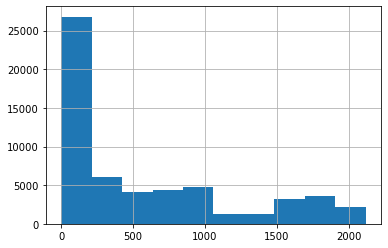

In [55]:
tab['CLIENT_USERAGENT_POPULARITY'].describe(), tab['CLIENT_USERAGENT_POPULARITY'].hist() 

In [56]:
tab = add_length_column(tab, 'CLIENT_USERAGENT', True)

(count    57845.000000
 mean        98.084744
 std         38.517471
 min          2.000000
 25%         68.000000
 50%        102.000000
 75%        126.000000
 max        365.000000
 Name: CLIENT_USERAGENT_LENGTH, dtype: float64,
 <AxesSubplot:>)

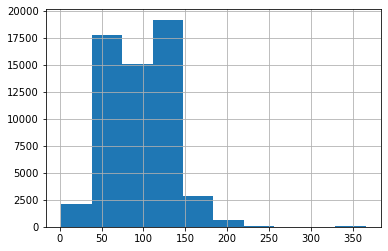

In [57]:
tab['CLIENT_USERAGENT_LENGTH'].describe(), tab['CLIENT_USERAGENT_LENGTH'].hist() 

Теперь добавим колонку, отвечающую за популярность к MATCHED_VARIABLE_SRC.

In [58]:
tab = add_popularity_column(tab, 'MATCHED_VARIABLE_SRC')

Отдельно мы вводим колонку, отвечающую за наличие точки с запятой, так как это выглядит как аномалия.

In [59]:
tab['MATCHED_VARIABLE_SRC_HAS_SEMICOLUMN'] = tab['MATCHED_VARIABLE_SRC'].str.contains(';') 

In [60]:
tab['MATCHED_VARIABLE_SRC_HAS_SEMICOLUMN'].value_counts()

False    56025
True      1705
Name: MATCHED_VARIABLE_SRC_HAS_SEMICOLUMN, dtype: int64

Теперь добавим колонки, отвечающие за популярность и длину к MATCHED_VARIABLE_NAME.

Здесь без конвертации мы свалимся. Однако число ввиде названия переменной, на мой взгляд, не выглядит как аномалия.

Если это аномалия, HDBSCAN может обнаружить это сам. Я не хочу решать за него.

In [61]:
tab = add_length_column(tab, 'MATCHED_VARIABLE_NAME', True)

In [62]:
tab['MATCHED_VARIABLE_NAME_LENGTH'].describe()

count    57845.000000
mean        20.274561
std         19.130891
min          1.000000
25%         12.000000
50%         18.000000
75%         26.000000
max        255.000000
Name: MATCHED_VARIABLE_NAME_LENGTH, dtype: float64

<AxesSubplot:>

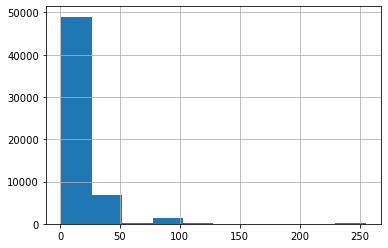

In [63]:
tab['MATCHED_VARIABLE_NAME_LENGTH'].hist()

In [64]:
tab = add_popularity_column(tab, 'MATCHED_VARIABLE_NAME')

In [65]:
tab['MATCHED_VARIABLE_NAME_POPULARITY'].describe()

count    53167.00000
mean      3377.53537
std       4215.80991
min          1.00000
25%        134.00000
50%       1350.00000
75%       3945.00000
max      11165.00000
Name: MATCHED_VARIABLE_NAME_POPULARITY, dtype: float64

<AxesSubplot:>

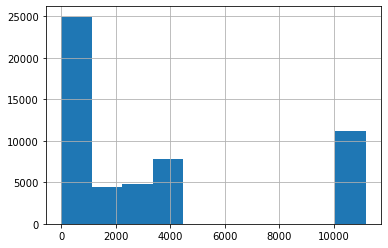

In [66]:
tab['MATCHED_VARIABLE_NAME_POPULARITY'].hist()

Теперь мы добавим колонки, отвечающие за длину и популярность к MATCHED_VARIABLE_VALUE.

In [67]:
tab = add_popularity_column(tab, 'MATCHED_VARIABLE_VALUE')

C:\Users\Семья\Documents\positive_technologies\processing.py:69: FutureWarning: Passing 'suffixes' which cause duplicate columns {'index_x'} in the result is deprecated and will raise a MergeError in a future version.
  tab = pd.merge(


In [68]:
tab = add_length_column(tab, 'MATCHED_VARIABLE_VALUE', True)

In [69]:
tab['MATCHED_VARIABLE_VALUE_LENGTH'].describe()

count    57845.000000
mean       106.810148
std        200.981650
min          1.000000
25%         13.000000
50%         30.000000
75%         74.000000
max       1000.000000
Name: MATCHED_VARIABLE_VALUE_LENGTH, dtype: float64

<AxesSubplot:>

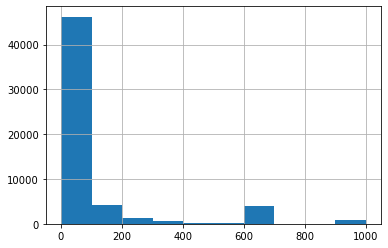

In [70]:
tab['MATCHED_VARIABLE_VALUE_LENGTH'].hist()

In [71]:
tab['MATCHED_VARIABLE_VALUE_POPULARITY'].describe()

count    57683.000000
mean         1.014666
std          0.596000
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         28.000000
Name: MATCHED_VARIABLE_VALUE_POPULARITY, dtype: float64

<AxesSubplot:>

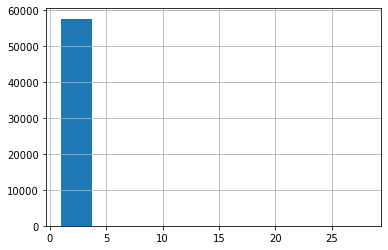

In [72]:
tab['MATCHED_VARIABLE_VALUE_POPULARITY'].hist()

Теперь мы добавим колонку, отвечающую за популярность EVENT_ID.

In [73]:
tab = add_popularity_column(tab, 'EVENT_ID')

In [74]:
tab['EVENT_ID_POPULARITY'].describe()

count    57666.000000
mean         1.128013
std          0.409143
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          7.000000
Name: EVENT_ID_POPULARITY, dtype: float64

<AxesSubplot:>

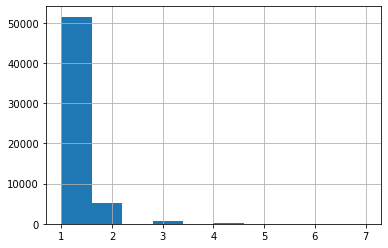

In [75]:
tab['EVENT_ID_POPULARITY'].hist()

In [76]:
tab.columns

Index(['CLIENT_IP', 'CLIENT_USERAGENT', 'REQUEST_SIZE', 'RESPONSE_CODE',
       'MATCHED_VARIABLE_SRC', 'MATCHED_VARIABLE_NAME',
       'MATCHED_VARIABLE_VALUE', 'EVENT_ID', 'anomaly_CLIENT_IP',
       'anomaly_CLIENT_USERAGENT', 'anomaly_request_size', 'REQUEST_SIZE_INT',
       'RESPONSE_CODE_INT', 'anomaly_MATCHED_VARIABLE_VALUE',
       'anomaly_EVENT_ID', 'anomaly_MATCHED_VARIABLE_SRC',
       'anomaly_MATCHED_VARIABLE_NAME', 'CLIENT_IP_1', 'CLIENT_IP_2',
       'CLIENT_IP_3', 'CLIENT_IP_4', 'anomaly_client_ip', 'index_x',
       'CLIENT_USERAGENT_POPULARITY', 'CLIENT_USERAGENT_LENGTH', 'index_y',
       'MATCHED_VARIABLE_SRC_POPULARITY',
       'MATCHED_VARIABLE_SRC_HAS_SEMICOLUMN', 'MATCHED_VARIABLE_NAME_LENGTH',
       'index_x', 'MATCHED_VARIABLE_NAME_POPULARITY', 'index_y',
       'MATCHED_VARIABLE_VALUE_POPULARITY', 'MATCHED_VARIABLE_VALUE_LENGTH',
       'index', 'EVENT_ID_POPULARITY'],
      dtype='object')

In [77]:
len(tab[tab['anomaly_CLIENT_IP'] + tab['anomaly_CLIENT_USERAGENT'] + tab['anomaly_EVENT_ID'] + tab['anomaly_MATCHED_VARIABLE_SRC'] + tab['anomaly_MATCHED_VARIABLE_NAME'] + tab['anomaly_MATCHED_VARIABLE_VALUE'] + tab['anomaly_request_size'] + tab['anomaly_client_ip'] > 0])/len(tab)

0.08721583542224912

In [78]:
tab = tab[['REQUEST_SIZE_INT',
       'anomaly_request_size', 'RESPONSE_CODE_INT', 'CLIENT_IP_1',
       'CLIENT_IP_2', 'CLIENT_IP_3', 'CLIENT_IP_4', 'anomaly_client_ip',
       'CLIENT_USERAGENT_POPULARITY', 'CLIENT_USERAGENT_LENGTH',
       'MATCHED_VARIABLE_SRC_POPULARITY',
       'MATCHED_VARIABLE_SRC_HAS_SEMICOLUMN', 'MATCHED_VARIABLE_NAME_LENGTH',
       'MATCHED_VARIABLE_NAME_POPULARITY',
       'MATCHED_VARIABLE_VALUE_LENGTH',
       'MATCHED_VARIABLE_VALUE_POPULARITY', 'EVENT_ID_POPULARITY',
       'anomaly_CLIENT_IP', 'anomaly_CLIENT_USERAGENT', 'anomaly_MATCHED_VARIABLE_VALUE',
       'anomaly_EVENT_ID', 'anomaly_MATCHED_VARIABLE_SRC',
       'anomaly_MATCHED_VARIABLE_NAME']]

In [79]:
tab.describe()

,REQUEST_SIZE_INT,anomaly_request_size,RESPONSE_CODE_INT,CLIENT_IP_1,CLIENT_IP_2,CLIENT_IP_3,CLIENT_IP_4,anomaly_client_ip,CLIENT_USERAGENT_POPULARITY,CLIENT_USERAGENT_LENGTH,...,MATCHED_VARIABLE_NAME_POPULARITY,MATCHED_VARIABLE_VALUE_LENGTH,MATCHED_VARIABLE_VALUE_POPULARITY,EVENT_ID_POPULARITY,anomaly_CLIENT_IP,anomaly_CLIENT_USERAGENT,anomaly_MATCHED_VARIABLE_VALUE,anomaly_EVENT_ID,anomaly_MATCHED_VARIABLE_SRC,anomaly_MATCHED_VARIABLE_NAME
count,5.773000e+04,57845.000000,57730.000000,57845.000000,57845.000000,57845.000000,57845.000000,57845.000000,57517.000000,57845.000000,...,53167.00000,57845.000000,57683.000000,57666.000000,57845.000000,57845.000000,57845.000000,57845.000000,57845.000000,57845.000000
mean,5.802108e+03,0.001988,300.387892,136.685988,135.081321,128.564474,103.172841,0.007071,557.733453,98.084744,...,3377.53537,106.810148,1.014666,1.128013,0.000121,0.005670,0.002801,0.003094,0.001988,0.080871
std,1.124405e+05,0.044544,98.733956,70.514846,68.598368,65.652327,68.936018,0.083790,647.516887,38.517471,...,4215.80991,200.981650,0.596000,0.409143,0.011000,0.075088,0.052847,0.055542,0.044544,0.272640
min,1.500000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,...,1.00000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.710000e+02,0.000000,200.000000,83.000000,72.000000,81.000000,57.000000,0.000000,23.000000,68.000000,...,134.00000,13.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.720000e+02,0.000000,302.000000,153.000000,159.000000,140.000000,70.000000,0.000000,230.000000,102.000000,...,1350.00000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.621000e+03,0.000000,404.000000,213.000000,175.000000,166.000000,155.000000,0.000000,927.000000,126.000000,...,3945.00000,74.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.052965e+07,1.000000,504.000000,223.000000,255.000000,255.000000,255.000000,1.000000,2117.000000,365.000000,...,11165.00000,1000.000000,28.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Использование HDBSCAN.

In [80]:
import hdbscan

Число 100 подбиралось эмпирически. Аномалии --- это достаточно маленькие кластеры. 
Мы хотим, чтобы их было не слишком много, потому что мы действуем так, будто хотим посмотреть их все вручную.
Я попробовал несколько вариантов, и остановился на 100.

In [81]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=100, prediction_data=True)

In [82]:
clusterer.fit(tab.fillna(-1))

HDBSCAN(min_cluster_size=100, prediction_data=True)

In [83]:
clusterer.labels_.max()

74

In [84]:
tab['cluster_label'] = clusterer.labels_

Смотрим на распределение явных аномалий по кластерам. Часть попала в кластер "все остальные".

In [85]:
tab[tab['anomaly_client_ip'] == 1]['cluster_label'].value_counts()

-1     136
 26    115
 53     95
 73     36
 17     22
 9       2
 65      2
 43      1
Name: cluster_label, dtype: int64

In [86]:
tab[tab['anomaly_request_size'] == 1]['cluster_label'].value_counts()

26    115
Name: cluster_label, dtype: int64

In [87]:
tab.columns

Index(['REQUEST_SIZE_INT', 'anomaly_request_size', 'RESPONSE_CODE_INT',
       'CLIENT_IP_1', 'CLIENT_IP_2', 'CLIENT_IP_3', 'CLIENT_IP_4',
       'anomaly_client_ip', 'CLIENT_USERAGENT_POPULARITY',
       'CLIENT_USERAGENT_LENGTH', 'MATCHED_VARIABLE_SRC_POPULARITY',
       'MATCHED_VARIABLE_SRC_HAS_SEMICOLUMN', 'MATCHED_VARIABLE_NAME_LENGTH',
       'MATCHED_VARIABLE_NAME_POPULARITY', 'MATCHED_VARIABLE_VALUE_LENGTH',
       'MATCHED_VARIABLE_VALUE_POPULARITY', 'EVENT_ID_POPULARITY',
       'anomaly_CLIENT_IP', 'anomaly_CLIENT_USERAGENT',
       'anomaly_MATCHED_VARIABLE_VALUE', 'anomaly_EVENT_ID',
       'anomaly_MATCHED_VARIABLE_SRC', 'anomaly_MATCHED_VARIABLE_NAME',
       'cluster_label'],
      dtype='object')

In [88]:
tab[tab['anomaly_CLIENT_USERAGENT'] == 1]['cluster_label'].value_counts()

 73    229
-1      48
 26     34
 64      6
 17      4
 72      3
 2       1
 42      1
 52      1
 9       1
Name: cluster_label, dtype: int64

In [89]:
tab[tab['anomaly_MATCHED_VARIABLE_VALUE'] == 1]['cluster_label'].value_counts()

 26    115
 2      36
 1       6
-1       5
Name: cluster_label, dtype: int64

In [90]:
tab[tab['anomaly_EVENT_ID'] == 1]['cluster_label'].value_counts()

 26    115
 2      51
 1       7
-1       5
 72      1
Name: cluster_label, dtype: int64

In [91]:
tab[tab['anomaly_MATCHED_VARIABLE_SRC'] == 1]['cluster_label'].value_counts()

26    115
Name: cluster_label, dtype: int64

In [92]:
tab[tab['anomaly_MATCHED_VARIABLE_NAME'] == 1]['cluster_label'].value_counts()

 73    2245
-1     1253
 66     356
 65     276
 26     237
 33     166
 7      132
 2        9
 1        3
 70       1
Name: cluster_label, dtype: int64

In [93]:
aggtab = pd.DataFrame(tab['cluster_label'].value_counts())

In [94]:
len(tab)*0.01

578.45

In [95]:
len(aggtab)

76

In [96]:
len(aggtab[aggtab['cluster_label'] <= 531])

58

In [97]:
aggtab['cluster_label']/len(tab)

-1     0.321238
 68    0.070723
 73    0.052572
 6     0.052502
 17    0.039969
         ...   
 71    0.001902
 49    0.001902
 61    0.001815
 27    0.001763
 60    0.001746
Name: cluster_label, Length: 76, dtype: float64

In [98]:
aggtab['cluster_label'].sum()

57845

In [99]:
aggtab[aggtab['cluster_label'] <= 531]['cluster_label'].sum()

12555

<AxesSubplot:>

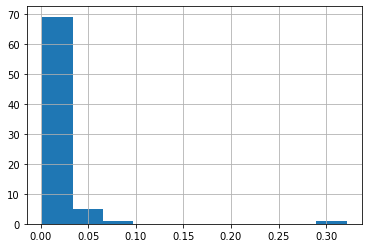

In [100]:
(aggtab['cluster_label']/len(tab)).hist()

<AxesSubplot:>

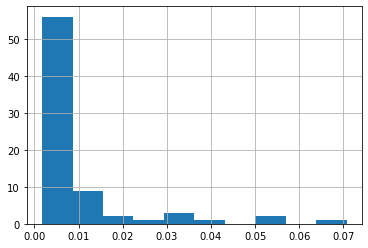

In [101]:
(aggtab.loc[aggtab['cluster_label'] < 0.2*len(tab), 'cluster_label']/len(tab)).hist()

<AxesSubplot:>

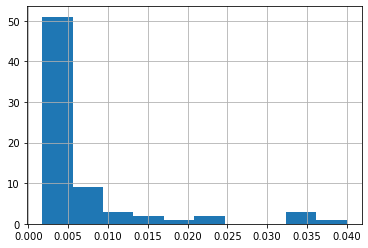

In [102]:
(aggtab.loc[aggtab['cluster_label'] < 0.05*len(tab), 'cluster_label']/len(tab)).hist()

<AxesSubplot:>

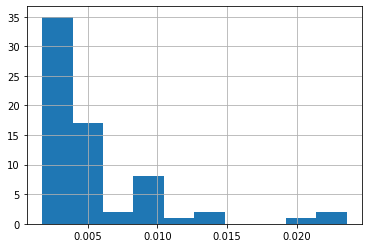

In [103]:
(aggtab.loc[aggtab['cluster_label'] < 0.03*len(tab), 'cluster_label']/len(tab)).hist()

<AxesSubplot:>

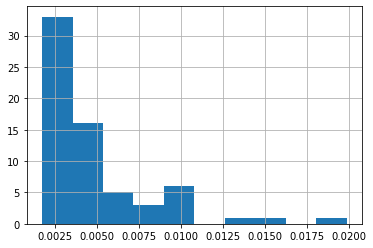

In [104]:
(aggtab.loc[aggtab['cluster_label'] < 0.02*len(tab), 'cluster_label']/len(tab)).hist()

In [105]:
aggtab_red = aggtab[aggtab['cluster_label'] < 0.02*len(tab)]

In [106]:
len(aggtab_red), len(aggtab)

(66, 76)

In [107]:
aggtab_red['cluster_label'].sum()/aggtab['cluster_label'].sum()

0.3156020399343072

<AxesSubplot:>

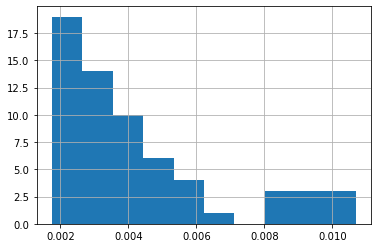

In [108]:
(aggtab.loc[aggtab['cluster_label'] < 0.012*len(tab), 'cluster_label']/len(tab)).hist()

In [109]:
aggtab_red = aggtab[aggtab['cluster_label'] < 0.012*len(tab)]

In [110]:
len(aggtab_red)

63

In [111]:
aggtab_red['cluster_label'].sum()/aggtab['cluster_label'].sum()

0.26688564266574466

In [112]:
aggtab_red = aggtab[aggtab['cluster_label'] < 0.007*len(tab)]

In [113]:
len(aggtab_red)

54

In [114]:
aggtab_red['cluster_label'].sum()/aggtab['cluster_label'].sum()

0.1824703950211773

Приведённые выше графики позволили понять, что такое аномалии.
Аномалии -- это достаточно маленькие кластеры.
Но они должны составлять все вместе не слишком большую часть данных.
Мы ищем точку разрыва на гистограмме методом орлиного глаза.
На 2%, например, получается 31.56% аномалий, что не разумно.
На 0.7% получается 18.25% аномалий, что вполне разумно. 

Однако мы забыли добавить уже найденные аномалии. Давайте это исправим.

# Отметки аномалиями в исходных данных.

In [115]:
aggtab_red.reset_index(inplace = True)

In [116]:
aggtab_red.rename(columns = {'index': 'cluster_label', 'cluster_label': 'cluster_size'}, inplace = True)

C:\Users\Семья\AppData\Local\Temp\ipykernel_71188\1157607108.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggtab_red.rename(columns = {'index': 'cluster_label', 'cluster_label': 'cluster_size'}, inplace = True)


In [117]:
aggtab_red.reset_index(inplace = True)

In [118]:
aggtab_red.rename(columns = {'index': 'anomality_label'}, inplace = True)

C:\Users\Семья\AppData\Local\Temp\ipykernel_71188\271087543.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggtab_red.rename(columns = {'index': 'anomality_label'}, inplace = True)


In [119]:
aggtab_red['cluster_size'] = aggtab_red['cluster_size']/len(tab) 

C:\Users\Семья\AppData\Local\Temp\ipykernel_71188\2578214635.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggtab_red['cluster_size'] = aggtab_red['cluster_size']/len(tab)


In [120]:
tab = pd.merge(tab, aggtab_red, how='left', left_on = ['cluster_label'], right_on = ['cluster_label'])

In [121]:
tab['cluster_size'].describe()

count    10555.000000
mean         0.003846
std          0.001335
min          0.001746
25%          0.002766
50%          0.004063
75%          0.004512
max          0.006915
Name: cluster_size, dtype: float64

In [122]:
import numpy as np

Теперь пришло время добавить аномалии, которые мы отметили до этого, если они ещё не добавлены.

In [123]:
tab['anomality_label'].max()

53.0

In [124]:
tab.columns

Index(['REQUEST_SIZE_INT', 'anomaly_request_size', 'RESPONSE_CODE_INT',
       'CLIENT_IP_1', 'CLIENT_IP_2', 'CLIENT_IP_3', 'CLIENT_IP_4',
       'anomaly_client_ip', 'CLIENT_USERAGENT_POPULARITY',
       'CLIENT_USERAGENT_LENGTH', 'MATCHED_VARIABLE_SRC_POPULARITY',
       'MATCHED_VARIABLE_SRC_HAS_SEMICOLUMN', 'MATCHED_VARIABLE_NAME_LENGTH',
       'MATCHED_VARIABLE_NAME_POPULARITY', 'MATCHED_VARIABLE_VALUE_LENGTH',
       'MATCHED_VARIABLE_VALUE_POPULARITY', 'EVENT_ID_POPULARITY',
       'anomaly_CLIENT_IP', 'anomaly_CLIENT_USERAGENT',
       'anomaly_MATCHED_VARIABLE_VALUE', 'anomaly_EVENT_ID',
       'anomaly_MATCHED_VARIABLE_SRC', 'anomaly_MATCHED_VARIABLE_NAME',
       'cluster_label', 'anomality_label', 'cluster_size'],
      dtype='object')

In [125]:
len(tab[tab['anomaly_CLIENT_IP'] == 1]), len(tab[(tab['anomaly_CLIENT_IP'] == 1) & (np.isnan(tab['anomality_label']))]) 

(7, 0)

Все уже занесены.

In [126]:
len(tab[tab['anomaly_client_ip'] == 1]), len(tab[(tab['anomaly_client_ip'] == 1) & (np.isnan(tab['anomality_label']))]) 

(409, 197)

In [127]:
tab.loc[tab['anomaly_client_ip'] == 1, 'anomality_label'] = 54

In [128]:
len(tab[tab['anomaly_request_size'] == 1]), len(tab[(tab['anomaly_request_size'] == 1) & (np.isnan(tab['anomality_label']))]) 

(115, 0)

Все уже занесены.

In [129]:
len(tab[tab['anomaly_CLIENT_USERAGENT'] == 1]), len(tab[(tab['anomaly_CLIENT_USERAGENT'] == 1) & (np.isnan(tab['anomality_label']))]) 

(328, 285)

In [130]:
tab.loc[tab['anomaly_CLIENT_USERAGENT'] == 1, 'anomality_label'] = 55

In [131]:
len(tab[tab['anomaly_MATCHED_VARIABLE_VALUE'] == 1]), len(tab[(tab['anomaly_MATCHED_VARIABLE_VALUE'] == 1) & (np.isnan(tab['anomality_label']))]) 

(162, 41)

In [132]:
tab.loc[tab['anomaly_MATCHED_VARIABLE_VALUE'] == 1, 'anomality_label'] = 56

In [133]:
len(tab[tab['anomaly_EVENT_ID'] == 1]), len(tab[(tab['anomaly_EVENT_ID'] == 1) & (np.isnan(tab['anomality_label']))]) 

(179, 19)

In [134]:
tab.loc[tab['anomaly_EVENT_ID'] == 1, 'anomality_label'] = 57

In [135]:
len(tab[tab['anomaly_MATCHED_VARIABLE_SRC'] == 1]), len(tab[(tab['anomaly_MATCHED_VARIABLE_SRC'] == 1) & (np.isnan(tab['anomality_label']))]) 

(115, 0)

Все уже занесены.

In [136]:
len(tab[tab['anomaly_MATCHED_VARIABLE_NAME'] == 1]), len(tab[(tab['anomaly_MATCHED_VARIABLE_NAME'] == 1) & (np.isnan(tab['anomality_label']))]) 

(4678, 3221)

In [137]:
tab.loc[tab['anomaly_MATCHED_VARIABLE_NAME'] == 1, 'anomality_label'] = 58

In [138]:
tab['anomality_label'].max()

58.0

In [139]:
tab['anomality_label'].describe()

count    14318.000000
mean        34.407180
std         21.049684
min          0.000000
25%         14.000000
50%         34.000000
75%         58.000000
max         58.000000
Name: anomality_label, dtype: float64

In [140]:
tab['anomality_label'].value_counts()

58.0    4678
0.0      399
2.0      346
3.0      319
4.0      312
6.0      276
7.0      266
8.0      261
9.0      260
10.0     260
12.0     254
11.0     254
13.0     253
14.0     248
15.0     242
17.0     236
18.0     235
54.0     230
19.0     221
20.0     210
21.0     197
22.0     196
23.0     194
24.0     192
25.0     189
26.0     188
27.0     175
29.0     172
30.0     165
32.0     163
31.0     163
33.0     160
34.0     153
36.0     148
37.0     146
38.0     142
39.0     141
40.0     135
41.0     129
42.0     125
44.0     119
46.0     116
47.0     111
50.0     110
48.0     110
49.0     110
45.0     106
51.0     105
52.0     102
53.0     101
55.0      70
57.0      63
43.0      27
35.0      20
28.0       6
5.0        4
56.0       4
16.0       1
Name: anomality_label, dtype: int64

Теперь у нас 58 кластера, при том последние 5 добавлены потом к кластеризации.

In [141]:
tab_anomaly = tab[~np.isnan(tab['anomality_label'])]

In [142]:
len(tab_anomaly)/len(tab)

0.24752355432621662

Итог: аномалии это 24.76% данных, что естественно, учитывая, обилие пропущенных значений.

In [143]:
tab_anomaly_mapping = tab_anomaly[['cluster_label', 'anomality_label']].drop_duplicates()
tab_anomaly_mapping.to_csv('anomaly_mapping.csv')

In [144]:
for anomality_label in range(int(tab_anomaly['anomality_label'].max())):
    tabred = tab[tab['anomality_label'] == anomality_label]
    print(tabred.describe())
    if len(tabred) > 0:
        print(tabred.sample(1, random_state=239))
        print('************')

       REQUEST_SIZE_INT  anomaly_request_size  RESPONSE_CODE_INT  CLIENT_IP_1  \
count        399.000000                 399.0         399.000000   399.000000   
mean         378.964912                   0.0         290.796992   122.270677   
std          104.897120                   0.0          47.646272    59.174743   
min          149.000000                   0.0         200.000000     2.000000   
25%          318.500000                   0.0         302.000000    84.000000   
50%          340.000000                   0.0         302.000000   107.000000   
75%          458.000000                   0.0         302.000000   185.000000   
max          640.000000                   0.0         404.000000   219.000000   

       CLIENT_IP_2  CLIENT_IP_3  CLIENT_IP_4  anomaly_client_ip  \
count   399.000000   399.000000   399.000000              399.0   
mean    129.423559   128.877193   118.115288                0.0   
std      72.632645    64.129717    66.267288                0.0   
mi

       REQUEST_SIZE_INT  anomaly_request_size  RESPONSE_CODE_INT  CLIENT_IP_1  \
15393            1046.0                     0              200.0          185   

       CLIENT_IP_2  CLIENT_IP_3  CLIENT_IP_4  anomaly_client_ip  \
15393           39          113           56                  0   

       CLIENT_USERAGENT_POPULARITY  CLIENT_USERAGENT_LENGTH  ...  \
15393                        366.0                       61  ...   

       EVENT_ID_POPULARITY anomaly_CLIENT_IP  anomaly_CLIENT_USERAGENT  \
15393                  1.0                 0                         0   

       anomaly_MATCHED_VARIABLE_VALUE  anomaly_EVENT_ID  \
15393                               0                 0   

       anomaly_MATCHED_VARIABLE_SRC  anomaly_MATCHED_VARIABLE_NAME  \
15393                             0                              0   

       cluster_label  anomality_label  cluster_size  
15393             65              5.0      0.004841  

[1 rows x 26 columns]
************
       REQUE

       REQUEST_SIZE_INT  anomaly_request_size  RESPONSE_CODE_INT  CLIENT_IP_1  \
count        260.000000                 260.0         260.000000   260.000000   
mean         357.061538                   0.0         223.900000   119.203846   
std          143.156757                   0.0          50.039961    73.896938   
min          181.000000                   0.0         200.000000    23.000000   
25%          288.000000                   0.0         200.000000    54.000000   
50%          289.000000                   0.0         200.000000    54.000000   
75%          356.250000                   0.0         200.000000   217.000000   
max          807.000000                   0.0         504.000000   217.000000   

       CLIENT_IP_2  CLIENT_IP_3  CLIENT_IP_4  anomaly_client_ip  \
count   260.000000   260.000000   260.000000              260.0   
mean    121.215385   133.557692    82.207692                0.0   
std      79.190790    32.165363    56.062664                0.0   
mi

       REQUEST_SIZE_INT  anomaly_request_size  RESPONSE_CODE_INT  CLIENT_IP_1  \
count               1.0                   1.0                1.0          1.0   
mean              909.0                   0.0              200.0         77.0   
std                 NaN                   NaN                NaN          NaN   
min               909.0                   0.0              200.0         77.0   
25%               909.0                   0.0              200.0         77.0   
50%               909.0                   0.0              200.0         77.0   
75%               909.0                   0.0              200.0         77.0   
max               909.0                   0.0              200.0         77.0   

       CLIENT_IP_2  CLIENT_IP_3  CLIENT_IP_4  anomaly_client_ip  \
count          1.0          1.0          1.0                1.0   
mean         232.0         15.0         81.0                0.0   
std            NaN          NaN          NaN                NaN   
mi

       REQUEST_SIZE_INT  anomaly_request_size  RESPONSE_CODE_INT  CLIENT_IP_1  \
count        196.000000                 196.0         196.000000   196.000000   
mean         718.010204                   0.0         294.663265   208.489796   
std          224.716596                   0.0          45.336676    31.106680   
min          300.000000                   0.0         200.000000    37.000000   
25%          558.000000                   0.0         302.000000   217.000000   
50%          635.500000                   0.0         302.000000   217.000000   
75%          823.750000                   0.0         302.000000   217.000000   
max         1356.000000                   0.0         504.000000   217.000000   

       CLIENT_IP_2  CLIENT_IP_3  CLIENT_IP_4  anomaly_client_ip  \
count   196.000000   196.000000   196.000000              196.0   
mean    172.979592   137.464286    70.908163                0.0   
std      26.963405    20.890281    25.037648                0.0   
mi

       REQUEST_SIZE_INT  anomaly_request_size  RESPONSE_CODE_INT  CLIENT_IP_1  \
count        172.000000                 172.0         172.000000   172.000000   
mean         559.662791                   0.0         204.837209   113.395349   
std           83.245654                   0.0          28.785905    66.487967   
min          376.000000                   0.0         200.000000     5.000000   
25%          520.000000                   0.0         200.000000    93.000000   
50%          543.500000                   0.0         200.000000   130.000000   
75%          607.750000                   0.0         200.000000   141.000000   
max          772.000000                   0.0         404.000000   217.000000   

       CLIENT_IP_2  CLIENT_IP_3  CLIENT_IP_4  anomaly_client_ip  \
count   172.000000   172.000000   172.000000              172.0   
mean    141.104651   157.046512    49.122093                0.0   
std      88.511146    56.702653    26.777231                0.0   
mi

[1 rows x 26 columns]
************
       REQUEST_SIZE_INT  anomaly_request_size  RESPONSE_CODE_INT  CLIENT_IP_1  \
count         20.000000                  20.0          20.000000    20.000000   
mean        8100.900000                   0.0         245.450000   205.100000   
std          477.221663                   0.0         100.973928    36.770841   
min         7599.000000                   0.0         200.000000    88.000000   
25%         7826.000000                   0.0         200.000000   217.000000   
50%         7843.000000                   0.0         200.000000   217.000000   
75%         8450.000000                   0.0         200.000000   217.000000   
max         9483.000000                   0.0         504.000000   217.000000   

       CLIENT_IP_2  CLIENT_IP_3  CLIENT_IP_4  anomaly_client_ip  \
count    20.000000    20.000000    20.000000               20.0   
mean    176.250000   144.300000    63.500000                0.0   
std       4.733698    14.216743   

       REQUEST_SIZE_INT  anomaly_request_size  RESPONSE_CODE_INT  CLIENT_IP_1  \
count             141.0                 141.0              141.0        141.0   
mean              683.0                   0.0              200.0         37.0   
std                 0.0                   0.0                0.0          0.0   
min               683.0                   0.0              200.0         37.0   
25%               683.0                   0.0              200.0         37.0   
50%               683.0                   0.0              200.0         37.0   
75%               683.0                   0.0              200.0         37.0   
max               683.0                   0.0              200.0         37.0   

       CLIENT_IP_2  CLIENT_IP_3  CLIENT_IP_4  anomaly_client_ip  \
count        141.0        141.0        141.0              141.0   
mean          46.0        129.0        136.0                0.0   
std            0.0          0.0          0.0                0.0   
mi

       REQUEST_SIZE_INT  anomaly_request_size  RESPONSE_CODE_INT  CLIENT_IP_1  \
count        106.000000                 106.0         106.000000   106.000000   
mean      145299.764151                   0.0         214.207547   188.839623   
std         6239.608487                   0.0          64.158690     4.283160   
min       133402.000000                   0.0         200.000000   188.000000   
25%       140667.500000                   0.0         200.000000   188.000000   
50%       146030.000000                   0.0         200.000000   188.000000   
75%       150395.500000                   0.0         200.000000   188.000000   
max       156945.000000                   0.0         502.000000   213.000000   

       CLIENT_IP_2  CLIENT_IP_3  CLIENT_IP_4  anomaly_client_ip  \
count   106.000000   106.000000   106.000000              106.0   
mean     45.632075    52.622642   162.000000                0.0   
std      18.105156    15.529666    12.652875                0.0   
mi

       REQUEST_SIZE_INT  anomaly_request_size  RESPONSE_CODE_INT  CLIENT_IP_1  \
count        105.000000                 105.0         105.000000        105.0   
mean         557.742857                   0.0         267.352381        217.0   
std            3.334057                   0.0          49.920317          0.0   
min          548.000000                   0.0         200.000000        217.0   
25%          556.000000                   0.0         200.000000        217.0   
50%          556.000000                   0.0         304.000000        217.0   
75%          558.000000                   0.0         304.000000        217.0   
max          567.000000                   0.0         304.000000        217.0   

       CLIENT_IP_2  CLIENT_IP_3  CLIENT_IP_4  anomaly_client_ip  \
count        105.0        105.0        105.0              105.0   
mean         175.0        140.0         69.0                0.0   
std            0.0          0.0          0.0                0.0   
mi

[1 rows x 26 columns]
************
       REQUEST_SIZE_INT  anomaly_request_size  RESPONSE_CODE_INT  CLIENT_IP_1  \
count          4.000000                   4.0                4.0          4.0   
mean      132749.000000                   0.0              275.5        188.0   
std        38559.017242                   0.0              151.0          0.0   
min        86799.000000                   0.0              200.0        188.0   
25%       118287.000000                   0.0              200.0        188.0   
50%       131586.000000                   0.0              200.0        188.0   
75%       146048.000000                   0.0              275.5        188.0   
max       181025.000000                   0.0              502.0        188.0   

       CLIENT_IP_2  CLIENT_IP_3  CLIENT_IP_4  anomaly_client_ip  \
count          4.0          4.0          4.0                4.0   
mean          43.0         52.0        163.0                0.0   
std            0.0          0.0   

Сохраним нашу HDBSCAN модель.

In [145]:
import pickle

In [146]:
with open('hdbscan_model.pickle', 'wb') as handle:
    pickle.dump(clusterer, handle)